<a href="https://colab.research.google.com/github/sharinair14/Python-programs/blob/master/KNN_Classifier_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('/content/classified-data.xlsx',index_col=0)

In [3]:
data.head()

,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
WTT,,,,,,,,,,
0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(data.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_features = scaler.transform(data.drop('TARGET CLASS',axis=1))

In [8]:
df = pd.DataFrame(scaled_features,columns=data.columns[:-1])

In [9]:
df.head()

,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(df,data['TARGET CLASS'],test_size=0.3)

In [12]:
len(X_train)

700

In [13]:
len(X_test)

300

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [17]:
ypred = knn.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
print("Accuracy is ",accuracy_score(y_test,ypred))

Accuracy is  0.86


In [20]:
print("Classication Report ",classification_report(y_test,ypred))

Classication Report                precision    recall  f1-score   support

           0       0.88      0.85      0.87       158
           1       0.84      0.87      0.85       142

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [21]:
print("Confusion Matrix ",confusion_matrix(y_test,ypred))

Confusion Matrix  [[135  23]
 [ 19 123]]


**Selecting K** **Values**

In [34]:
error_rate = []
for i in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  ypred = knn.predict(X_test)
  error_rate.append(np.mean(ypred != y_test))

Text(0.5, 1.0, 'Error rate VS K Value')

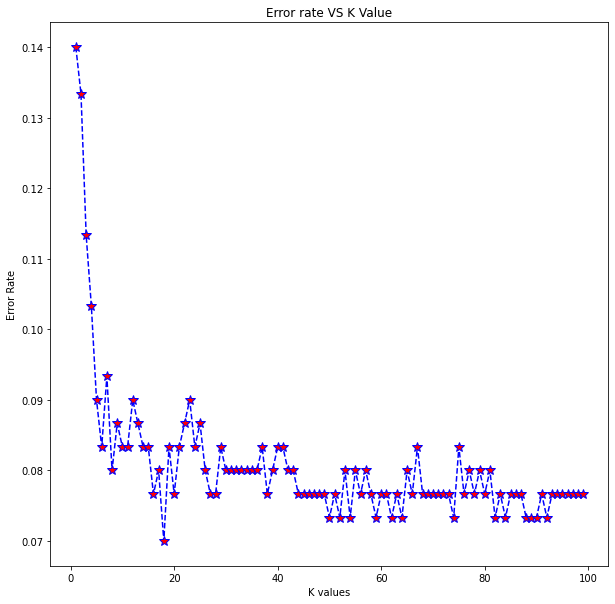

In [36]:
plt.figure(figsize=(10,10))
plt.plot(range(1,100),error_rate,marker='*',markerfacecolor='red',markersize=10,color='blue',linestyle='dashed')
plt.xlabel('K values')
plt.ylabel('Error Rate')
plt.title("Error rate VS K Value")


**Comparison of K's different value**

In [29]:
print('For k=1')
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
ypred = knn.predict(X_test)
print("Confusion Matrix ",confusion_matrix(y_test,ypred))
print("Classication Report ",classification_report(y_test,ypred))
print("Accuracy is ",accuracy_score(y_test,ypred))

For k=1
Confusion Matrix  [[135  23]
 [ 19 123]]
Classication Report                precision    recall  f1-score   support

           0       0.88      0.85      0.87       158
           1       0.84      0.87      0.85       142

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

Accuracy is  0.86


In [41]:
print('For k=25')
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
ypred = knn.predict(X_test)
print("Confusion Matrix ",confusion_matrix(y_test,ypred))
print("Classication Report ",classification_report(y_test,ypred))
print("Accuracy is ",accuracy_score(y_test,ypred))

For k=25
Confusion Matrix  [[140  18]
 [  8 134]]
Classication Report                precision    recall  f1-score   support

           0       0.95      0.89      0.92       158
           1       0.88      0.94      0.91       142

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300

Accuracy is  0.9133333333333333


In [40]:
print('For k=28')
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train,y_train)
ypred = knn.predict(X_test)
print("Confusion Matrix ",confusion_matrix(y_test,ypred))
print("Classication Report ",classification_report(y_test,ypred))
print("Accuracy is ",accuracy_score(y_test,ypred))

For k=28
Confusion Matrix  [[143  15]
 [  8 134]]
Classication Report                precision    recall  f1-score   support

           0       0.95      0.91      0.93       158
           1       0.90      0.94      0.92       142

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Accuracy is  0.9233333333333333


In [39]:
print('For k=35')
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train,y_train)
ypred = knn.predict(X_test)
print("Confusion Matrix ",confusion_matrix(y_test,ypred))
print("Classication Report ",classification_report(y_test,ypred))
print("Accuracy is ",accuracy_score(y_test,ypred))

For k=35
Confusion Matrix  [[143  15]
 [  7 135]]
Classication Report                precision    recall  f1-score   support

           0       0.95      0.91      0.93       158
           1       0.90      0.95      0.92       142

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

Accuracy is  0.9266666666666666
